# Cleaning using pandas and Seaborn

Here I will: 
 
- Load the dataset into Pandas DataFrames   
- Perform visualizations to get a feel for the data  
- Clean the data to fill in missing values   
- Create new rows and columns as to perform better insights into the data  
- Export the new csvs for more future exploration  






I'll start by importing all necessary libraries at the top of the project.
Then I'll use pandas to read the csv as a DataFrame.

I want my SQLite database (solar.db) to have a copy of the original csv data as a table, so my first step will be to inspect the DataFrame in order to know how to write the schema for it's table. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

original_solar_df = pd.read_csv('../csv_files/solar_power_by_country.csv')
original_solar_df.head(5)

,Country or territory,2016_New,2016_Total,2017_New,2017_Total,2018_New,2018_Total,2019_New,2019_Total,2020_New,2020_Total,W per capita 2019,Share of total consumption %
0,China,34540.0,78070.0,53000.0,131000.0,45000.0,175018,30100.0,204700,49655.0,254355,147.0,6.2
1,European Union,NaN,101433.0,NaN,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.0
2,United States,14730.0,40300.0,10600.0,51000.0,10600.0,53184,13300.0,60682,14890.0,75572,231.0,3.4
3,Japan,8600.0,42750.0,7000.0,49000.0,6500.0,55500,7000.0,63000,4000.0,67000,498.0,8.3
4,Germany,1520.0,41220.0,1800.0,42000.0,3000.0,45930,3900.0,49200,4583.0,53783,593.0,9.7


Next I need rename the columns in order to match the sql schema (see sql_files../schema.sql), as sql tables cannot start with a number.

In [2]:
# First I make a copy, as to preserve the csv's data exactly as-is in the original DataFrame

solar_df = original_solar_df.copy()

solar_df.columns = ['country', '_2016_new', '_2016_total', '_2017_new', '_2017_total',
                     '_2018_new', '_2018_total', '_2019_new', '_2019_total',
                     '_2020_new', '_2020_total', 'w_per_capita_2019', 'share_of_total_consumption']

print(solar_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     80 non-null     object 
 1   _2016_new                   36 non-null     float64
 2   _2016_total                 75 non-null     float64
 3   _2017_new                   36 non-null     float64
 4   _2017_total                 75 non-null     float64
 5   _2018_new                   20 non-null     float64
 6   _2018_total                 80 non-null     int64  
 7   _2019_new                   14 non-null     float64
 8   _2019_total                 80 non-null     int64  
 9   _2020_new                   27 non-null     float64
 10  _2020_total                 80 non-null     int64  
 11  w_per_capita_2019           59 non-null     float64
 12  share_of_total_consumption  42 non-null     float64
dtypes: float64(9), int64(3), object(1)
me

Now that the column names match, I can insert the DataFrame into my database.

In [3]:
conn = sqlite3.connect('../solar.db')

solar_df.to_sql('solar_generation', conn, if_exists='replace', index=False)

conn.close()

# I ran SELECT * FROM solar_generation LIMIT 5; in queries.sql to verify the data is correctly inserted. It is.

solar_df.head(3)


80

,country,_2016_new,_2016_total,_2017_new,_2017_total,_2018_new,_2018_total,_2019_new,_2019_total,_2020_new,_2020_total,w_per_capita_2019,share_of_total_consumption
0,China,34540.0,78070.0,53000.0,131000.0,45000.0,175018,30100.0,204700,49655.0,254355,147.0,6.2
1,European Union,NaN,101433.0,NaN,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.0
2,United States,14730.0,40300.0,10600.0,51000.0,10600.0,53184,13300.0,60682,14890.0,75572,231.0,3.4


Now that the original csv data is preserved as a dataframe and a table, and column names are in manageable formats, I can start to explore the data.

In [4]:
print(solar_df.isnull().sum())
display(solar_df.describe())
solar_df.head(5)
print(solar_df.info())

country                        0
_2016_new                     44
_2016_total                    5
_2017_new                     44
_2017_total                    5
_2018_new                     60
_2018_total                    0
_2019_new                     66
_2019_total                    0
_2020_new                     53
_2020_total                    0
w_per_capita_2019             21
share_of_total_consumption    38
dtype: int64


,_2016_new,_2016_total,_2017_new,_2017_total,_2018_new,_2018_total,_2019_new,_2019_total,_2020_new,_2020_total,w_per_capita_2019,share_of_total_consumption
count,36.000000,75.000000,36.000000,75.000000,20.000000,80.000000,14.000000,80.000000,27.000000,80.000000,59.000000,42.000000
mean,2038.527778,5284.040000,2596.138889,6608.546667,4882.255000,7486.862500,6839.428571,8900.562500,5228.333333,10757.000000,141.101695,4.690476
std,6235.740879,16523.515061,8988.374584,21201.180765,10076.187123,24952.807349,8312.978405,28970.430989,9948.967940,34808.938642,145.559408,3.169736
min,1.000000,2.000000,4.000000,8.000000,0.000000,8.000000,81.000000,9.000000,15.000000,85.000000,2.000000,0.100000
25%,52.500000,49.500000,59.250000,99.500000,89.775000,134.000000,1209.500000,210.750000,736.500000,214.000000,34.500000,2.500000
50%,185.000000,202.000000,211.500000,298.000000,1450.000000,490.500000,3800.000000,855.000000,1833.000000,1060.500000,88.000000,3.900000
75%,748.500000,1530.000000,900.000000,1850.000000,4475.000000,2573.750000,9175.000000,3372.500000,4061.000000,5431.000000,190.000000,6.500000
max,34540.000000,101433.000000,53000.000000,131000.000000,45000.000000,175018.000000,30100.000000,204700.000000,49655.000000,254355.000000,637.000000,12.900000


,country,_2016_new,_2016_total,_2017_new,_2017_total,_2018_new,_2018_total,_2019_new,_2019_total,_2020_new,_2020_total,w_per_capita_2019,share_of_total_consumption
0,China,34540.0,78070.0,53000.0,131000.0,45000.0,175018,30100.0,204700,49655.0,254355,147.0,6.2
1,European Union,NaN,101433.0,NaN,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.0
2,United States,14730.0,40300.0,10600.0,51000.0,10600.0,53184,13300.0,60682,14890.0,75572,231.0,3.4
3,Japan,8600.0,42750.0,7000.0,49000.0,6500.0,55500,7000.0,63000,4000.0,67000,498.0,8.3
4,Germany,1520.0,41220.0,1800.0,42000.0,3000.0,45930,3900.0,49200,4583.0,53783,593.0,9.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     80 non-null     object 
 1   _2016_new                   36 non-null     float64
 2   _2016_total                 75 non-null     float64
 3   _2017_new                   36 non-null     float64
 4   _2017_total                 75 non-null     float64
 5   _2018_new                   20 non-null     float64
 6   _2018_total                 80 non-null     int64  
 7   _2019_new                   14 non-null     float64
 8   _2019_total                 80 non-null     int64  
 9   _2020_new                   27 non-null     float64
 10  _2020_total                 80 non-null     int64  
 11  w_per_capita_2019           59 non-null     float64
 12  share_of_total_consumption  42 non-null     float64
dtypes: float64(9), int64(3), object(1)
me

Looks like I have a lot of missing values, by far most of them in the "new" categories. I can create a function to fill in many of the missing "new" values by subtracting the previous year from the following year.

In [5]:
def fill_new_generation(df):
    for year in range(2017, 2021):
        new_col = f"_{year}_new"
        total_col = f"_{year}_total"
        prev_total_col = f"_{year-1}_total"

        df.loc[df[new_col].isna(), new_col] = df[total_col] - df[prev_total_col]
    return df

solar_df = fill_new_generation(solar_df)

print(solar_df.isnull().sum())
solar_df.head(2)

# Successfully filled in missing "new" values.

country                        0
_2016_new                     44
_2016_total                    5
_2017_new                      5
_2017_total                    5
_2018_new                      5
_2018_total                    0
_2019_new                      0
_2019_total                    0
_2020_new                      0
_2020_total                    0
w_per_capita_2019             21
share_of_total_consumption    38
dtype: int64


,country,_2016_new,_2016_total,_2017_new,_2017_total,_2018_new,_2018_total,_2019_new,_2019_total,_2020_new,_2020_total,w_per_capita_2019,share_of_total_consumption
0,China,34540.0,78070.0,53000.0,131000.0,45000.0,175018,30100.0,204700,49655.0,254355,147.0,6.2
1,European Union,NaN,101433.0,5717.0,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.0


The function greatly reduced the missing value count. While I could fill the _2016_new values with aggregation, let's find
out if the column is even worth keeping.

In [6]:
missing_2016_new = solar_df['_2016_new'].isnull().sum()
total_rows = len(solar_df['_2016_new'])

missing_percent = (missing_2016_new * 100) / total_rows
print(missing_percent)

55.0


As 55% of the _2016_new data is missing, and it is the first column in our data and we also have 2016 totals, it makes sense to drop the _2016_new column all together.

In [7]:
solar_df = solar_df.copy().drop(columns=['_2016_new'])
print(solar_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     80 non-null     object 
 1   _2016_total                 75 non-null     float64
 2   _2017_new                   75 non-null     float64
 3   _2017_total                 75 non-null     float64
 4   _2018_new                   75 non-null     float64
 5   _2018_total                 80 non-null     int64  
 6   _2019_new                   80 non-null     float64
 7   _2019_total                 80 non-null     int64  
 8   _2020_new                   80 non-null     float64
 9   _2020_total                 80 non-null     int64  
 10  w_per_capita_2019           59 non-null     float64
 11  share_of_total_consumption  42 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 7.6+ KB
None


Thinking about how to extrapolate insights from my dataset, it would be nice to have a region column from which I could group my countries. 

In [8]:
# Start by using AI to map each country name in my dataset to a region, as a list:

north_america = ['United States', 'Mexico', 'Canada', "Cuba", "Dominican Republic", "El Salvador", "Guatemala", "Honduras", "Panama" ]
south_america = ['Brazil', 'Chile', 'Argentina', 'Peru', 'Colombia', "Bolivia", "Uruguay"]
europe = [
    'Germany', 'Italy', 'Spain', 'United Kingdom', 'France', 'Netherlands',
    'Belgium', 'Poland', 'Greece', 'Switzerland', 'Austria', 'Czech Republic',
    'Hungary', 'Sweden', 'Romania', 'Denmark', 'Bulgaria', 'Portugal',
    'Slovakia', 'Finland', 'Slovenia', 'Luxembourg', 'Belarus', 'Norway',
    'Lithuania', 'Estonia', 'Croatia', "Russia", "Ukraine", "Cyprus", "Malta",
]
asia = [
    'China', 'Japan', 'India', 'Vietnam', 'South Korea', 'Turkey', 'Taiwan',
    'Thailand', 'United Arab Emirates', 'Israel', 'Malaysia', 'Philippines',
    'Pakistan', 'Iran', 'Iraq', 'Jordan', 'Oman', 'Saudi Arabia', 'Bangladesh', 'Indonesia', 'Cambodia', 'Singapore', 'Yemen'
]
africa = ['South Africa', 'Egypt', 'Morocco', 'Algeria', 'Kenya', "Namibia", "Senegal"]
australia = ["Australia", "New Zealand"]

sum = north_america + south_america + europe + asia + africa + australia

print(len(sum) + 1)
# The length of sum is correct

80


In [9]:
# Now I'll create a function that loops through each list adding them to a dictionary, then adds those dictionaries to the region_mapping
# dictionary. I then call it on my DataFrame, to add the new region column.

def assign_region(df):
    region_mapping = {}
    region_mapping.update({country: "North America" for country in north_america})
    region_mapping.update({country: "South America" for country in south_america})
    region_mapping.update({country: "Europe" for country in europe})
    region_mapping.update({country: "Asia" for country in asia})
    region_mapping.update({country: "Africa" for country in africa})
    region_mapping.update({country: "Australia" for country in australia})


    # Map the "region" column based on "country" names
    df["region"] = df["country"].map(region_mapping)

    return df

# Apply the function to the newly loaded DataFrame
solar_df = assign_region(solar_df)

solar_df.head(5)

,country,_2016_total,_2017_new,_2017_total,_2018_new,_2018_total,_2019_new,_2019_total,_2020_new,_2020_total,w_per_capita_2019,share_of_total_consumption,region
0,China,78070.0,53000.0,131000.0,45000.0,175018,30100.0,204700,49655.0,254355,147.0,6.2,Asia
1,European Union,101433.0,5717.0,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.0,NaN
2,United States,40300.0,10600.0,51000.0,10600.0,53184,13300.0,60682,14890.0,75572,231.0,3.4,North America
3,Japan,42750.0,7000.0,49000.0,6500.0,55500,7000.0,63000,4000.0,67000,498.0,8.3,Asia
4,Germany,41220.0,1800.0,42000.0,3000.0,45930,3900.0,49200,4583.0,53783,593.0,9.7,Europe


In order to maintain a nuanced understanding of the data, two DataFrames will be created, one that will maintain missing values (unless aggregates provide a very accurate picture of missing values), and one that fills in missing values when statistical reasoning is within an acceptable statistical threshold. That threshold is determined using coefficient variations primarily, but also applying common sense through summary statistics and looking at visual distributions.

In [10]:
# Start by preserving the non-aggregated DataFrame
aggregated_solar_df = solar_df.copy()

The next column that I will attempt to fill missing values in with aggregated values will be the share_of_total_consumption column. This next cell will analyze if aggregates should fill missing values, based on the above described statistical thresholds.


Coefficient variations of each region's share_of_total_consumption columns: region
Africa           0.299985
Asia             0.617914
Australia             NaN
Europe           0.613389
North America    1.064468
South America    0.968998
Name: share_of_total_consumption, dtype: float64

Std to interquartile range ratio, for each region's consumption columns: region
Africa           1.414214
Asia             0.719183
Australia             NaN
Europe           0.893059
North America    1.679863
South America    1.414214
Name: share_of_total_consumption, dtype: float64

Summary Statistics:


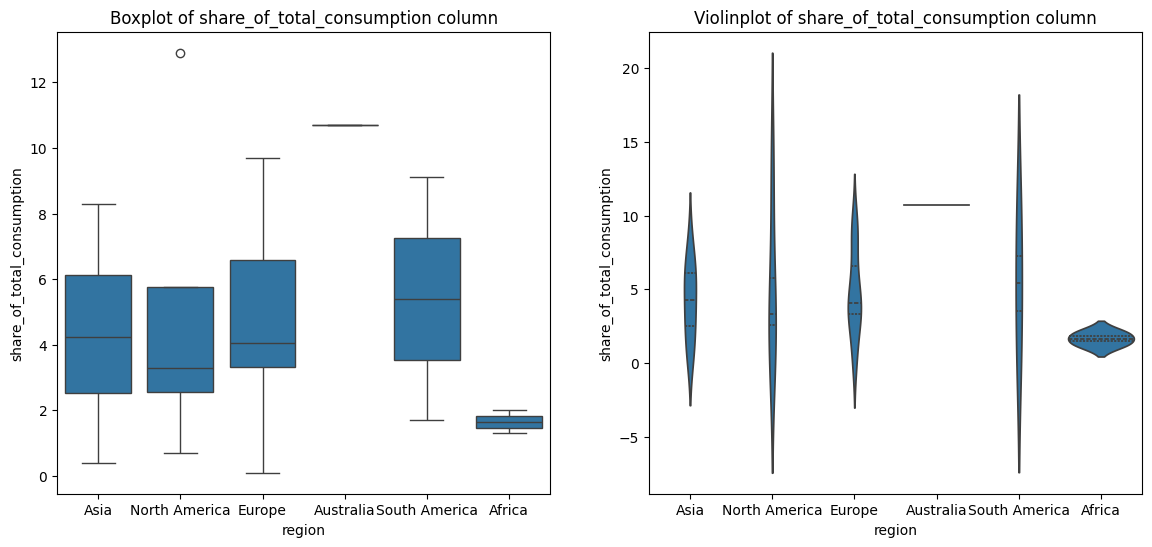

In [11]:
# Boxplot and violinplot for visual distributions

plt.figure(figsize=(14, 6))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(
    x='region',
    y='share_of_total_consumption',
    data=solar_df
)
plt.title('Boxplot of share_of_total_consumption column')

ax2 = plt.subplot(1, 2, 2)
sns.violinplot(
    x='region',
    y='share_of_total_consumption',
    data=solar_df,
    inner="quartile"
    )
plt.title('Violinplot of share_of_total_consumption column')


# Finding the coefficient variation by dividing the standard deviation of each region by each regions' mean.
region_mean = solar_df.groupby('region')['share_of_total_consumption'].mean()
std = solar_df.groupby('region')['share_of_total_consumption'].std()
coefficient_variation_ttl_consumption = std / region_mean

# I'll also divide the standard deviation by the middle quartile range, to see how outliers affect the std.
q1 = solar_df.groupby('region')['share_of_total_consumption'].quantile(0.25)
q3 = solar_df.groupby('region')['share_of_total_consumption'].quantile(0.75)
iqr = q3 - q1
std_quartile_ratio = std / iqr

# Statistics to understand distributions, to help decide to aggregate missing values:
print(f"\nCoefficient variations of each region's share_of_total_consumption columns: {coefficient_variation_ttl_consumption}")
print(f"\nStd to interquartile range ratio, for each region's consumption columns: {std_quartile_ratio}")
print('\nSummary Statistics:')
solar_df.groupby('region')['share_of_total_consumption'].describe()

plt.show();

Africa has a very small coefficient variation, so I will fill in missing values for solar_df and aggregated_df. Asia and Europe also have relatively small coefficient variations, so I will fill their missing values in the aggregated_df, but maintain them in solar_df to maintain the purity of that DataFrame.

The first print statements are here to see the change in missing values after the fill.

In [12]:
# Missing values before filling:
print(f"\n solar_df before filling: {solar_df.isna().sum()}")
print(f"\n aggregate_df before filling: {aggregated_solar_df.isna().sum()}"    )


# Aggregated values used to fill in missing values:
mean_african_total_consumption = solar_df.loc[solar_df['region'] == 'Africa', 'share_of_total_consumption'].mean()
median_asian_total_consumption = solar_df.loc[solar_df['region'] == 'Asia', 'share_of_total_consumption'].median()
median_european_total_consumption = solar_df.loc[solar_df['region'] == 'Europe', 'share_of_total_consumption'].median()


# Filling missing values:
solar_df.loc[solar_df['region'] == 'Africa', 'share_of_total_consumption'] = \
    solar_df.loc[solar_df['region'] == 'Africa', 'share_of_total_consumption'].fillna(mean_african_total_consumption)

aggregated_solar_df.loc[aggregated_solar_df['region'] == 'Asia', 'share_of_total_consumption'] = \
    aggregated_solar_df.loc[solar_df['region'] == 'Asia', 'share_of_total_consumption'].fillna(median_asian_total_consumption)

aggregated_solar_df.loc[solar_df['region'] == 'Europe', 'share_of_total_consumption'] = \
    aggregated_solar_df.loc[solar_df['region'] == 'Europe', 'share_of_total_consumption'].fillna(median_european_total_consumption)

aggregated_solar_df.loc[solar_df['region'] == 'Africa', 'share_of_total_consumption'] = \
    aggregated_solar_df.loc[solar_df['region'] == 'Africa', 'share_of_total_consumption'].fillna(mean_african_total_consumption)

print(f"\n solar_df after filling: {solar_df.isna().sum()}")
print(f"\n aggregate_df after filling: {aggregated_solar_df.isna().sum()}")


 solar_df before filling: country                        0
_2016_total                    5
_2017_new                      5
_2017_total                    5
_2018_new                      5
_2018_total                    0
_2019_new                      0
_2019_total                    0
_2020_new                      0
_2020_total                    0
w_per_capita_2019             21
share_of_total_consumption    38
region                         1
dtype: int64

 aggregate_df before filling: country                        0
_2016_total                    5
_2017_new                      5
_2017_total                    5
_2018_new                      5
_2018_total                    0
_2019_new                      0
_2019_total                    0
_2020_new                      0
_2020_total                    0
w_per_capita_2019             21
share_of_total_consumption    38
region                         1
dtype: int64

 solar_df after filling: country                        0

I'll repeat the same process for the w_per_capita_2019 column.


Coefficient variations of regions wats per capita: region
Africa           0.895567
Asia             1.190222
Australia             NaN
Europe           0.796131
North America    0.874025
South America    1.034790
Name: w_per_capita_2019, dtype: float64

Std to interquartile range ration to analyze outlier effects: region
Africa           0.726837
Asia             1.033134
Australia             NaN
Europe           0.784662
North America    1.181822
South America    1.414214
Name: w_per_capita_2019, dtype: float64

Summary Statistics:


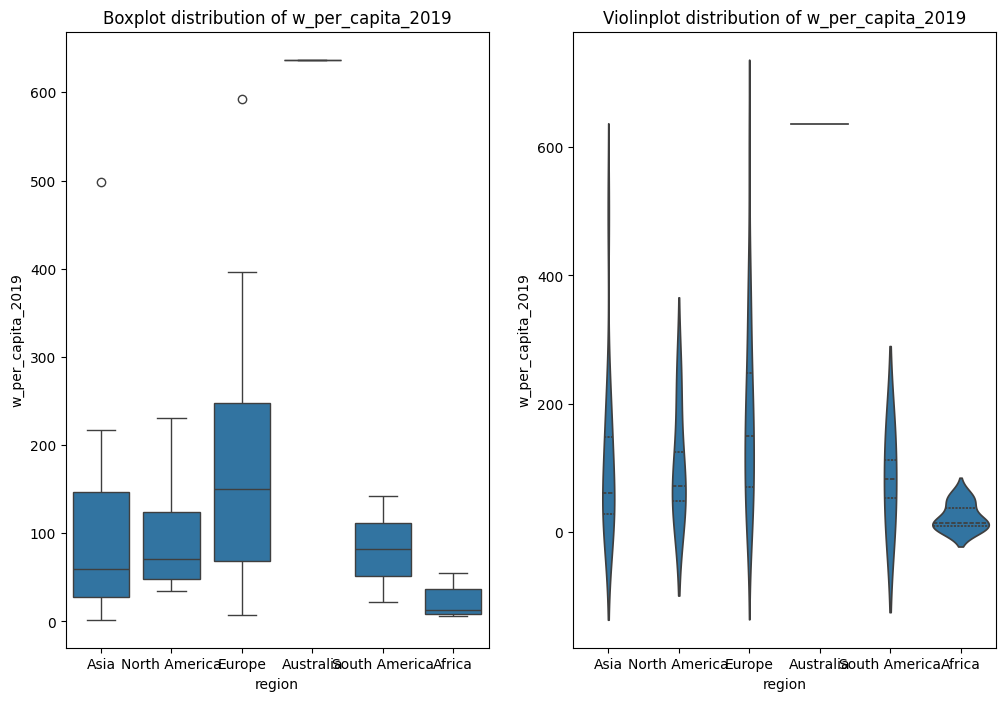

In [13]:
# boxplot and violin for visual distributions

plt.figure(figsize=(12, 8))

ax1 = plt.subplot(1, 2, 1)
sns.boxplot(
    x='region',
    y='w_per_capita_2019',
    data=solar_df
)
plt.title('Boxplot distribution of w_per_capita_2019')


ax2 = plt.subplot(1, 2, 2)
sns.violinplot(
    x='region',
    y='w_per_capita_2019',
    data=solar_df,
    inner="quartile"
    )
plt.title('Violinplot distribution of w_per_capita_2019')


# Finding the coefficient variation by dividing the standard deviation of each region by each regions' mean.
mean_wats = solar_df.groupby('region')['w_per_capita_2019'].mean()
std_wats = solar_df.groupby('region')['w_per_capita_2019'].std()
coefficient_variation_wats = std_wats / mean_wats

# I'll also divide the standard deviation by the middle quartile range, to see how outliers affect the std.
q1 = solar_df.groupby('region')['w_per_capita_2019'].quantile(0.25)
q3 = solar_df.groupby('region')['w_per_capita_2019'].quantile(0.75)
iqr_wats = q3 - q1
std_iqr_wats_ratio = std_wats / iqr_wats


# Statistics to understand distributions, to help decide to aggregate missing values:
print(f"\nCoefficient variations of regions wats per capita: {coefficient_variation_wats}")
print(f"\nStd to interquartile range ration to analyze outlier effects: {std_iqr_wats_ratio}")
print('\nSummary Statistics:')
solar_df.groupby('region')['w_per_capita_2019'].describe()

plt.show();

The same countries will receive the same treatment, as for total_consumption. While Europe has a very small coefficient variation and std/iqr ratio, it's spread is very large, and I don't want to fill in countries with data in solar_df that is too innacurate a representation.

In [14]:
# Missing values before filling:

print(f"\n solar_df before filling: {solar_df.isna().sum()}")
print(f"\n aggregate_df before filling: {aggregated_solar_df.isna().sum()}")

# Aggregate values to fill in missing values:
mean_african_wats= solar_df.loc[solar_df['region'] == 'Africa', 'w_per_capita_2019'].mean()
median_asian_wats = solar_df.loc[solar_df['region'] == 'Asia', 'w_per_capita_2019'].median()
median_european_wats= solar_df.loc[solar_df['region'] == 'Europe', 'w_per_capita_2019'].median()

# Filling in missing values:
solar_df.loc[solar_df['region'] == 'Africa', 'w_per_capita_2019'] = \
    solar_df.loc[solar_df['region'] == 'Africa', 'w_per_capita_2019'].fillna(mean_african_wats)

aggregated_solar_df.loc[aggregated_solar_df['region'] == 'Asia', 'w_per_capita_2019'] = \
    aggregated_solar_df.loc[solar_df['region'] == 'Asia', 'w_per_capita_2019'].fillna(median_asian_wats)

aggregated_solar_df.loc[solar_df['region'] == 'Europe', 'w_per_capita_2019'] = \
    aggregated_solar_df.loc[solar_df['region'] == 'Europe', 'w_per_capita_2019'].fillna(median_asian_wats)

aggregated_solar_df.loc[solar_df['region'] == 'Africa', 'w_per_capita_2019'] = \
    aggregated_solar_df.loc[solar_df['region'] == 'Africa', 'w_per_capita_2019'].fillna(mean_african_wats)


# Missing values after filling:
print(f"\n solar_df before filling: {solar_df.isna().sum()}")
print(f"\n aggregate_df before filling: {aggregated_solar_df.isna().sum()}")


 solar_df before filling: country                        0
_2016_total                    5
_2017_new                      5
_2017_total                    5
_2018_new                      5
_2018_total                    0
_2019_new                      0
_2019_total                    0
_2020_new                      0
_2020_total                    0
w_per_capita_2019             21
share_of_total_consumption    33
region                         1
dtype: int64

 aggregate_df before filling: country                        0
_2016_total                    5
_2017_new                      5
_2017_total                    5
_2018_new                      5
_2018_total                    0
_2019_new                      0
_2019_total                    0
_2020_new                      0
_2020_total                    0
w_per_capita_2019             21
share_of_total_consumption    11
region                         1
dtype: int64

 solar_df before filling: country                        

My DataFrames(s) have sigificantly fewer missing values than before I started cleaning. I'll take a closer look at where the missing values are, and if they can be filled.

In [15]:
missing_rows = aggregated_solar_df[aggregated_solar_df.isna().any(axis=1)]
missing_rows2 = solar_df[solar_df.isna().any(axis=1)]
duplicates = aggregated_solar_df.duplicated()

missing_rows2.head(5)
missing_rows.head(5)
print(duplicates)

,country,_2016_total,_2017_new,_2017_total,_2018_new,_2018_total,_2019_new,_2019_total,_2020_new,_2020_total,w_per_capita_2019,share_of_total_consumption,region
1,European Union,101433.0,5717.0,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.0,NaN
8,Vietnam,6.0,3.0,9.0,97.0,106,4800.0,5695,10909.0,16504,60.0,NaN,Asia
14,Brazil,NaN,900.0,1100.0,1313.0,2413,2138.0,4595,3145.0,7881,22.0,1.7,South America
17,Taiwan,NaN,NaN,NaN,NaN,2618,1482.0,4100,1717.0,5817,172.0,NaN,Asia
21,Poland,NaN,NaN,NaN,NaN,487,813.0,1300,2636.0,3936,34.0,NaN,Europe


,country,_2016_total,_2017_new,_2017_total,_2018_new,_2018_total,_2019_new,_2019_total,_2020_new,_2020_total,w_per_capita_2019,share_of_total_consumption,region
1,European Union,101433.0,5717.0,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.00,NaN
14,Brazil,NaN,900.0,1100.0,1313.0,2413,2138.0,4595,3145.0,7881,22.0,1.70,South America
17,Taiwan,NaN,NaN,NaN,NaN,2618,1482.0,4100,1717.0,5817,172.0,4.25,Asia
21,Poland,NaN,NaN,NaN,NaN,487,813.0,1300,2636.0,3936,34.0,4.05,Europe
23,Greece,NaN,NaN,NaN,NaN,2652,111.0,2763,484.0,3247,258.0,9.30,Europe


0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool


Aggregation can't be performed on any of the existing missing values to fill them within a reasonable statistical threshold. This concludes my initial cleaning of the data.

Now that the cleaning is done, I will save the final DataFrames as csv files, as well as load them into new tables within my solar.db SQLite database.

In [16]:
# Saving my dataframes as csvs:

solar_df.to_csv('solar_cleaned.csv', index=False)
aggregated_solar_df.to_csv('solar_cleaned_aggregated.csv', index=False)

In [17]:
# Adding the new DataFrames as tables to my database. See sql_files../schema.sql to see the table definitions.

conn = sqlite3.connect('../solar.db')

solar_df.to_sql('cleaned_solar', conn, if_exists='replace', index=False)
aggregated_solar_df.to_sql('aggregated_solar', conn, if_exists='replace', index=False)

conn.close()

80

80

In [18]:
# A simple query to make sure my DataFrame was successfully inserted into my table:

conn = sqlite3.connect("../solar.db")

query = f"""
SELECT region, AVG(share_of_total_consumption)
FROM aggregated_solar
GROUP BY region;
"""

avg_share_total_consumption_region = pd.read_sql(query, conn)

conn.close()

display(avg_share_total_consumption_region)

,region,AVG(share_of_total_consumption)
0,None,6.000000
1,Africa,1.650000
2,Asia,4.223913
3,Australia,10.700000
4,Europe,4.533871
5,North America,5.050000
6,South America,5.400000


Now let's really start exploring the data and global solar trends!